## Install and Setup

In [63]:
import pandas as pd
import numpy as np
from azure.storage.blob import BlobServiceClient
import config
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [33]:
connection_string = config.azure_blob_storage["connection_string"]
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container="datafactory", blob="input/data_1a1a465b-6bbb-4849-9ea1-20fc683f72e7_2b0601ce-91c5-45b5-bc20-67813544fe93.csv")

# Define the local path to save the file
local_file_path = "data_1a1a465b-6bbb-4849-9ea1-20fc683f72e7_2b0601ce-91c5-45b5-bc20-67813544fe93.csv"

# Download the blob and save it locally
with open(local_file_path, "wb") as file:
    file.write(blob_client.download_blob().readall())

In [34]:
df = pd.read_csv(local_file_path)
df.head()

,customer_id,customer_tenure,recency,total_orders_completed,total_sales_completed,total_sales,total_orders,returned_orders_ratio,cancelled_orders_ratio,customer_age,...,accessories,outerwear,shorts,fasion_hoodies,active,underwear,pants,socks,dresses,other
0,75990,457,844,1,19.990000,19.990000,1,0.0,0.0,35,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,77936,1,307,1,27.990000,27.990000,1,0.0,0.0,49,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
2,86560,1,1595,2,108.200001,108.200001,1,0.0,0.0,46,...,0.0,0.0,0.0,0.0,0.399261,0.0,0.0,0.0,0.0,0.0
3,5671,360,164,1,59.990002,104.980003,2,0.0,0.5,21,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
4,4628,1,1667,1,195.300003,195.300003,1,0.0,0.0,61,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [35]:
df.isna().sum()

customer_id                  0
customer_tenure              0
recency                      0
total_orders_completed       0
total_sales_completed        0
total_sales                  0
total_orders                 0
returned_orders_ratio        0
cancelled_orders_ratio       0
customer_age                 0
customer_gender              0
state                        0
city                       303
country                      0
total_cancels             5475
total_cart                5475
total_department          5475
total_home                5475
total_product             5475
total_purchases           5475
tops_and_tees                0
jeans                        0
intimates                    0
swim                         0
sweaters                     0
sleep                        0
accessories                  0
outerwear                    0
shorts                       0
fasion_hoodies               0
active                       0
underwear                    0
pants   

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27575 entries, 0 to 27574
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             27575 non-null  int64  
 1   customer_tenure         27575 non-null  int64  
 2   recency                 27575 non-null  int64  
 3   total_orders_completed  27575 non-null  int64  
 4   total_sales_completed   27575 non-null  float64
 5   total_sales             27575 non-null  float64
 6   total_orders            27575 non-null  int64  
 7   returned_orders_ratio   27575 non-null  float64
 8   cancelled_orders_ratio  27575 non-null  float64
 9   customer_age            27575 non-null  int64  
 10  customer_gender         27575 non-null  object 
 11  state                   27575 non-null  object 
 12  city                    27272 non-null  object 
 13  country                 27575 non-null  object 
 14  total_cancels           22100 non-null

In [72]:
df.describe()

,customer_id,customer_tenure,recency,total_orders_completed,total_sales_completed,total_sales,total_orders,returned_orders_ratio,cancelled_orders_ratio,customer_age,...,pants,socks,dresses,other,avg_order_value,clv,clv_log,country_encoded,gender_M,state_encoded
count,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,...,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000,27575.000000
mean,50035.009719,249.499909,477.164062,1.649937,98.072654,120.666114,1.394560,0.062514,0.098492,41.193255,...,0.041533,0.025883,0.033281,0.180100,59.212511,75.837390,2.221037,0.199157,0.499692,0.014916
std,28834.513379,381.175379,458.086585,1.024326,104.831726,124.138342,0.655256,0.224957,0.284112,16.993615,...,0.171442,0.138657,0.156289,0.336888,56.990927,187.946193,2.194495,0.120210,0.500009,0.013797
min,9.000000,1.000000,-1.000000,1.000000,0.020000,0.020000,1.000000,0.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.020000,0.004110,0.004101,0.000036,0.000000,0.000036
25%,25087.500000,1.000000,109.000000,1.000000,31.990000,39.000000,1.000000,0.000000,0.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,26.950001,0.169836,0.156863,0.052693,0.000000,0.005150
50%,50167.000000,27.000000,327.000000,1.000000,63.990002,79.989998,1.000000,0.000000,0.000000,41.000000,...,0.000000,0.000000,0.000000,0.000000,44.474999,3.286986,1.455584,0.226800,0.000000,0.010771
75%,74824.500000,385.000000,727.000000,2.000000,128.000000,159.980000,2.000000,0.000000,0.000000,56.000000,...,0.000000,0.000000,0.000000,0.178672,70.454167,67.535671,4.227354,0.338568,1.000000,0.018821
max,100000.000000,2140.000000,2174.000000,9.000000,1366.990000,1366.990000,4.000000,2.000000,2.666667,70.000000,...,1.000000,1.000000,1.000000,1.000000,990.000000,4111.742466,8.321845,0.338568,1.000000,0.053273


In [38]:
df.columns

Index(['customer_id', 'customer_tenure', 'recency', 'total_orders_completed',
       'total_sales_completed', 'total_sales', 'total_orders',
       'returned_orders_ratio', 'cancelled_orders_ratio', 'customer_age',
       'customer_gender', 'state', 'city', 'country', 'total_cancels',
       'total_cart', 'total_department', 'total_home', 'total_product',
       'total_purchases', 'tops_and_tees', 'jeans', 'intimates', 'swim',
       'sweaters', 'sleep', 'accessories', 'outerwear', 'shorts',
       'fasion_hoodies', 'active', 'underwear', 'pants', 'socks', 'dresses',
       'other'],
      dtype='object')

In [39]:
##fill missing values with zero, these customers most likely bought in store
columns_to_fill = ['total_cancels', 'total_cart', 'total_department', 'total_home', 'total_product', 'total_purchases']
for col in columns_to_fill:
    df[col] = df[col].fillna(0)
df.isna().sum()

customer_id                 0
customer_tenure             0
recency                     0
total_orders_completed      0
total_sales_completed       0
total_sales                 0
total_orders                0
returned_orders_ratio       0
cancelled_orders_ratio      0
customer_age                0
customer_gender             0
state                       0
city                      303
country                     0
total_cancels               0
total_cart                  0
total_department            0
total_home                  0
total_product               0
total_purchases             0
tops_and_tees               0
jeans                       0
intimates                   0
swim                        0
sweaters                    0
sleep                       0
accessories                 0
outerwear                   0
shorts                      0
fasion_hoodies              0
active                      0
underwear                   0
pants                       0
socks     

In [41]:
#avg order value
df['avg_order_value'] = df['total_sales_completed'] / df['total_orders_completed']
df['avg_order_value'].fillna(0, inplace=True)  # Handle division by zero

#order frequency
df['order_frequency'] = np.where(
    df['total_orders_completed'] == 0, 
    0,  # Replace with NaN or a default value (e.g., 0)
    df['tenure_days'] / df['total_orders_completed']
)

#target varaible
df['clv'] = df['avg_order_value'] * df['total_orders_completed'] * (df['customer_tenure'] /365)

df.head()

,customer_id,customer_tenure,recency,total_orders_completed,total_sales_completed,total_sales,total_orders,returned_orders_ratio,cancelled_orders_ratio,customer_age,...,shorts,fasion_hoodies,active,underwear,pants,socks,dresses,other,avg_order_value,clv
0,75990,457,844,1,19.990000,19.990000,1,0.0,0.0,35,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,19.990000,25.028575
1,77936,1,307,1,27.990000,27.990000,1,0.0,0.0,49,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,27.990000,0.076685
2,86560,1,1595,2,108.200001,108.200001,1,0.0,0.0,46,...,0.0,0.0,0.399261,0.0,0.0,0.0,0.0,0.0,54.100000,0.296438
3,5671,360,164,1,59.990002,104.980003,2,0.0,0.5,21,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,59.990002,59.168221
4,4628,1,1667,1,195.300003,195.300003,1,0.0,0.0,61,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,195.300003,0.535069


In [42]:
df.isna().sum()

customer_id                 0
customer_tenure             0
recency                     0
total_orders_completed      0
total_sales_completed       0
total_sales                 0
total_orders                0
returned_orders_ratio       0
cancelled_orders_ratio      0
customer_age                0
customer_gender             0
state                       0
city                      303
country                     0
total_cancels               0
total_cart                  0
total_department            0
total_home                  0
total_product               0
total_purchases             0
tops_and_tees               0
jeans                       0
intimates                   0
swim                        0
sweaters                    0
sleep                       0
accessories                 0
outerwear                   0
shorts                      0
fasion_hoodies              0
active                      0
underwear                   0
pants                       0
socks     

We're going to exclude the city and state from our model for now, so we don't need to worry about the city nulls

## EDA
We'll do some EDA here just to get an idea of what the data looks like, but once the model is complete we will do a thorough data analysis with Tableau

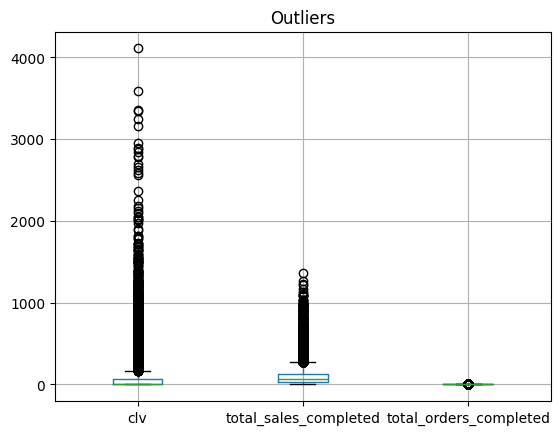

In [43]:
#let's check outliers with boxplots
df.boxplot(column=['clv', 'total_sales_completed', 'total_orders_completed'])
plt.title('Outliers')
plt.show()


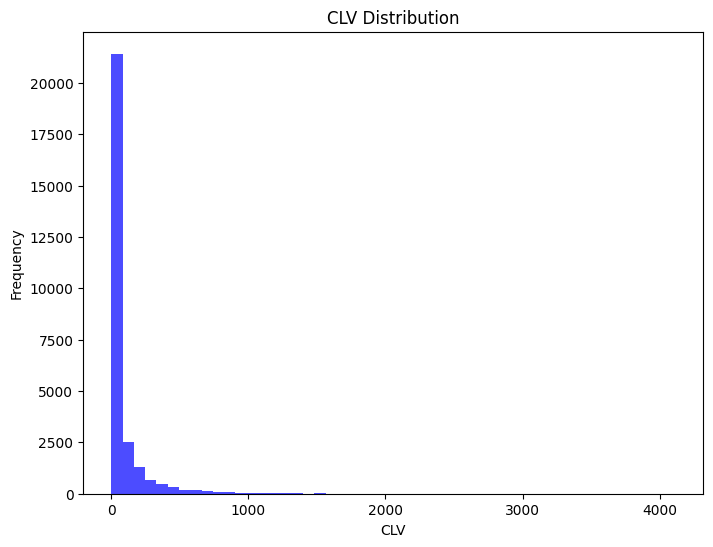

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(df['clv'], bins=50, color='blue', alpha=0.7)
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.title('CLV Distribution')
plt.show()


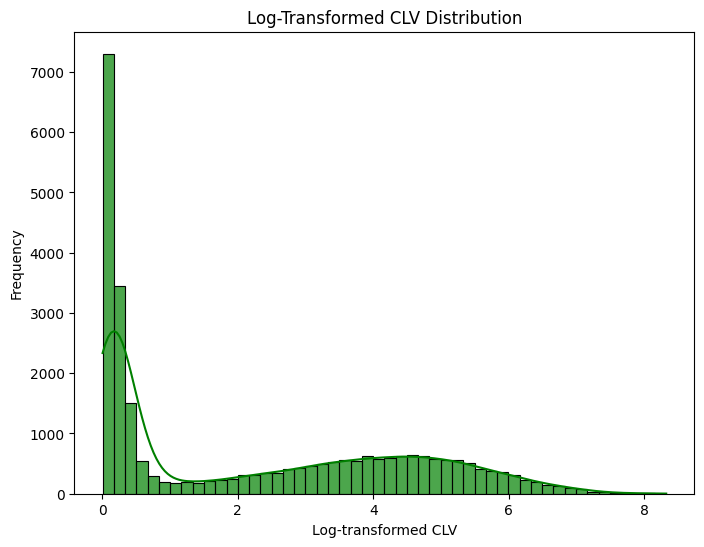

In [45]:
df['clv_log'] = np.log1p(df['clv'])

plt.figure(figsize=(8, 6))
sns.histplot(df['clv_log'], bins=50, kde=True, color='green', alpha=0.7)
plt.xlabel('Log-transformed CLV')
plt.ylabel('Frequency')
plt.title('Log-Transformed CLV Distribution')
plt.show()

In [48]:
# q1 = df['total_orders'].quantile(0.25)
# q3 = df['total_orders'].quantile(0.75)
# IQR = q3 - q1

# lower_bound = q1 - 1.5 * IQR
# upper_bound = q3 + 1.5 * IQR

# outliers = df[df['total_orders'] > upper_bound]
# print(outliers)

In [50]:
#calc frequencies
location_frequency = df['country'].value_counts(normalize=True)

df['country_encoded'] = df['country'].map(location_frequency)

In [58]:
#calc frequencies
location_frequency = df['state'].value_counts(normalize=True)

df['state_encoded'] = df['state'].map(location_frequency)

In [51]:
gender_dummies = pd.get_dummies(df['customer_gender'], prefix='gender', drop_first=True, dtype=int)
print(gender_dummies)
df = pd.concat([df, gender_dummies], axis=1)
df.head()

       gender_M
0             0
1             0
2             1
3             1
4             1
...         ...
27570         0
27571         1
27572         0
27573         1
27574         0

[27575 rows x 1 columns]


,customer_id,customer_tenure,recency,total_orders_completed,total_sales_completed,total_sales,total_orders,returned_orders_ratio,cancelled_orders_ratio,customer_age,...,underwear,pants,socks,dresses,other,avg_order_value,clv,clv_log,country_encoded,gender_M
0,75990,457,844,1,19.990000,19.990000,1,0.0,0.0,35,...,0.0,0.0,0.0,0.0,0.0,19.990000,25.028575,3.259195,0.146111,0
1,77936,1,307,1,27.990000,27.990000,1,0.0,0.0,49,...,0.0,0.0,0.0,0.0,0.0,27.990000,0.076685,0.073887,0.146111,0
2,86560,1,1595,2,108.200001,108.200001,1,0.0,0.0,46,...,0.0,0.0,0.0,0.0,0.0,54.100000,0.296438,0.259621,0.146111,1
3,5671,360,164,1,59.990002,104.980003,2,0.0,0.5,21,...,0.0,1.0,0.0,0.0,0.0,59.990002,59.168221,4.097144,0.146111,1
4,4628,1,1667,1,195.300003,195.300003,1,0.0,0.0,61,...,0.0,0.0,0.0,0.0,0.0,195.300003,0.535069,0.428575,0.146111,1


In [59]:
df.columns

Index(['customer_id', 'customer_tenure', 'recency', 'total_orders_completed',
       'total_sales_completed', 'total_sales', 'total_orders',
       'returned_orders_ratio', 'cancelled_orders_ratio', 'customer_age',
       'customer_gender', 'state', 'city', 'country', 'total_cancels',
       'total_cart', 'total_department', 'total_home', 'total_product',
       'total_purchases', 'tops_and_tees', 'jeans', 'intimates', 'swim',
       'sweaters', 'sleep', 'accessories', 'outerwear', 'shorts',
       'fasion_hoodies', 'active', 'underwear', 'pants', 'socks', 'dresses',
       'other', 'avg_order_value', 'clv', 'clv_log', 'country_encoded',
       'gender_M', 'state_encoded'],
      dtype='object')

In [53]:
features = ['customer_tenure', 'recency', 'total_orders_completed',
       'total_sales_completed', 'total_sales', 'total_orders',
       'returned_orders_ratio', 'cancelled_orders_ratio', 'customer_age', 'total_cancels',
       'total_cart', 'total_department', 'total_home', 'total_product',
       'total_purchases', 'tops_and_tees', 'jeans', 'intimates', 'swim',
       'sweaters', 'sleep', 'accessories', 'outerwear', 'shorts',
       'fasion_hoodies', 'active', 'underwear', 'pants', 'socks', 'dresses',
       'other', 'avg_order_value', 'clv', 'country_encoded',
       'gender_M']

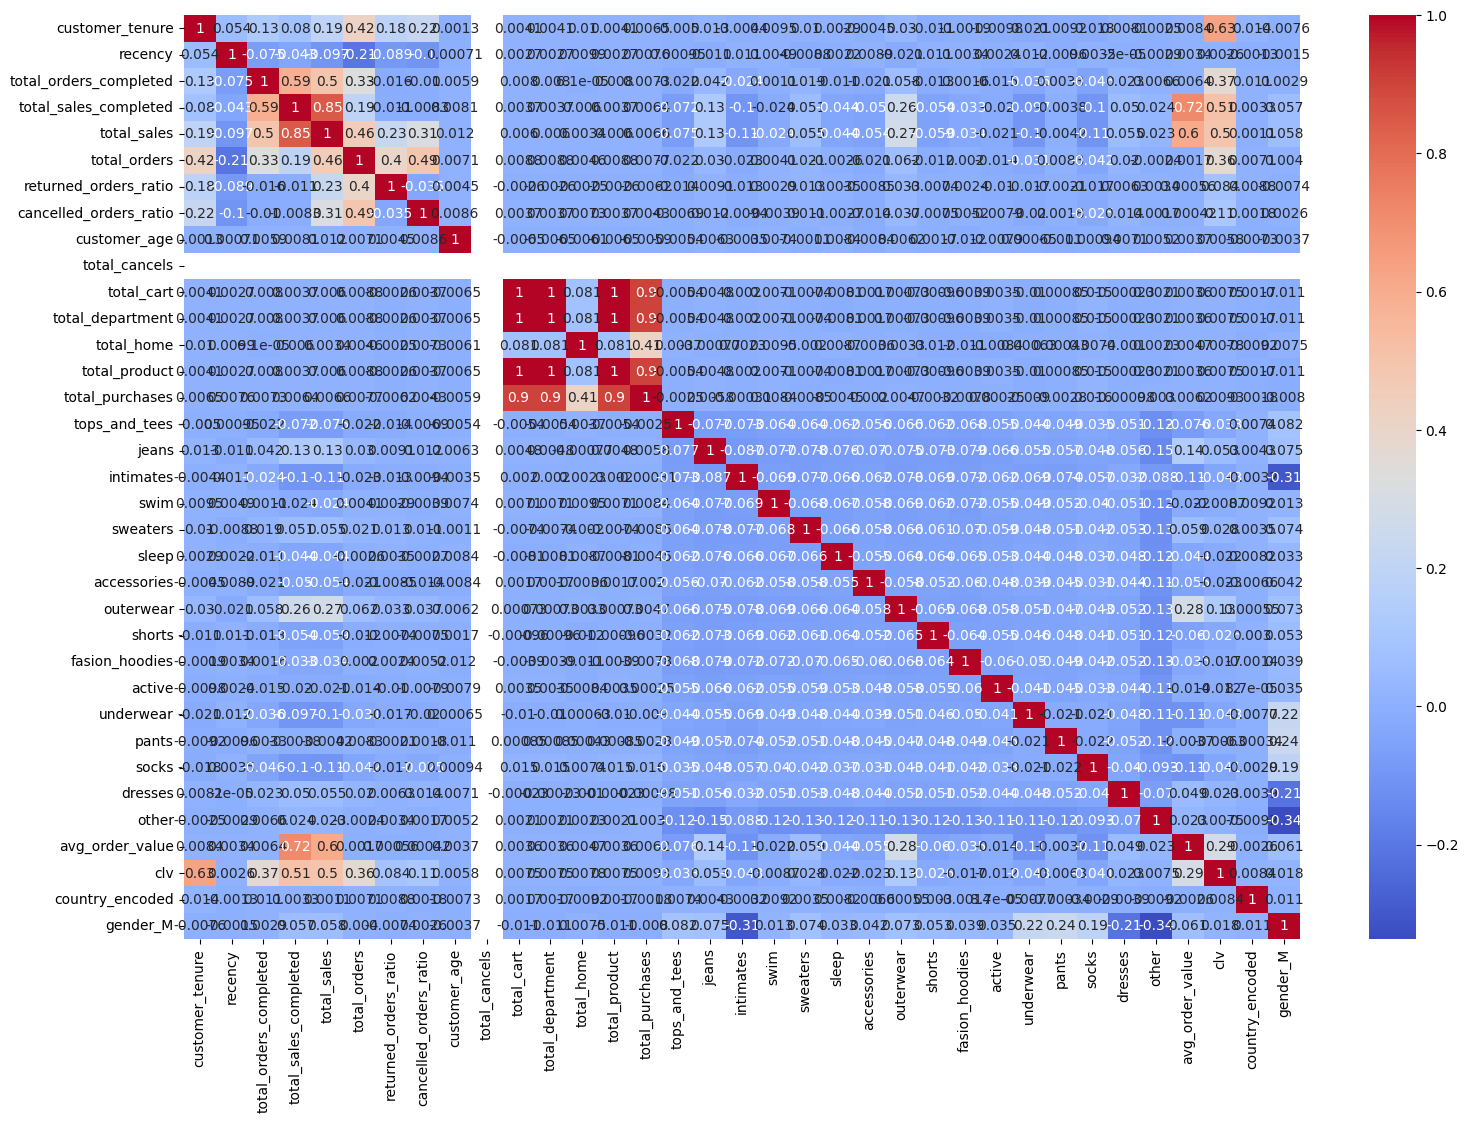

In [55]:
df_num = df[features]

plt.figure(figsize=(18, 12))
#check for correlation between feaetures
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

## Setup Model

we are excluding sales, order and tenure since those can lead to data leakage

In [68]:
features = ['recency', 'returned_orders_ratio', 'cancelled_orders_ratio', 'customer_age',
       'total_cart', 'total_department', 'total_home', 'total_product',
       'total_purchases', 'tops_and_tees', 'jeans', 'intimates', 'swim',
       'sweaters', 'sleep', 'accessories', 'outerwear', 'shorts',
       'fasion_hoodies', 'active', 'underwear', 'pants', 'socks', 'dresses',
       'other', 'avg_order_value', 'country_encoded',
       'gender_M', 'state_encoded']

target = 'clv_log'

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)

X_test_df = pd.DataFrame(X_test, columns=features)
X_test_df['linear_reg_preds'] = predictions

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r_2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R Squared: {r_2}")

MSE: 4.062476673629556
MAE: 1.7922239149308206
R Squared: 0.1570719933861089


## Hyperparmater GridSearch Random Forest

In [93]:
data_path = "/Users/amber/projects/my_customer_segmentation_project/ml-model/data/"
df = pd.read_csv(data_path + 'data_w_clusters.csv')
df.head()

,customer_id,customer_tenure,recency,total_orders_completed,monetary,total_sales,frequency,returned_orders_ratio,cancelled_orders_ratio,customer_age,...,shorts,fasion_hoodies,active,underwear,pants,socks,dresses,other,cluster_gmm,cluster_kmeans
0,75990,457,844,1,19.990000,19.990000,1,0.0,0.0,35,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,1
1,77936,1,307,1,27.990000,27.990000,1,0.0,0.0,49,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0,2
2,86560,1,1595,2,108.200001,108.200001,1,0.0,0.0,46,...,0.0,0.0,0.399261,0.0,0.0,0.0,0.0,0.0,0,1
3,5671,360,164,1,59.990002,104.980003,2,0.0,0.5,21,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,3,0
4,4628,1,1667,1,195.300003,195.300003,1,0.0,0.0,61,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,1


In [83]:
df.columns

Index(['customer_id', 'customer_tenure', 'recency', 'total_orders_completed',
       'monetary', 'total_sales', 'frequency', 'returned_orders_ratio',
       'cancelled_orders_ratio', 'customer_age', 'customer_gender', 'state',
       'city', 'country', 'total_cancels', 'total_cart', 'total_department',
       'total_home', 'total_product', 'total_purchases', 'tops_and_tees',
       'jeans', 'intimates', 'swim', 'sweaters', 'sleep', 'accessories',
       'outerwear', 'shorts', 'fasion_hoodies', 'active', 'underwear', 'pants',
       'socks', 'dresses', 'other', 'cluster_gmm', 'cluster_kmeans',
       'avg_order_value'],
      dtype='object')

In [94]:
# #avg order value
# df['avg_order_value'] = df['monetary'] / df['frequency']
# df['avg_order_value'].fillna(0, inplace=True)  # Handle division by zero

#order frequency
df['avg_order_value'] = np.where(
    df['frequency'] == 0, 
    0,  # Replace with NaN or a default value (e.g., 0)
    df['monetary'] / df['frequency']
)

#order frequency
df['order_frequency'] = np.where(
    df['frequency'] == 0, 
    0,  # Replace with NaN or a default value (e.g., 0)
    df['customer_tenure'] / df['frequency']
)

#target varaible
df['clv'] = df['avg_order_value'] * df['frequency'] * (df['customer_tenure'] /365)

df.head()

,customer_id,customer_tenure,recency,total_orders_completed,monetary,total_sales,frequency,returned_orders_ratio,cancelled_orders_ratio,customer_age,...,underwear,pants,socks,dresses,other,cluster_gmm,cluster_kmeans,avg_order_value,order_frequency,clv
0,75990,457,844,1,19.990000,19.990000,1,0.0,0.0,35,...,0.0,0.0,0.0,0.0,0.0,0,1,19.990000,457.0,25.028575
1,77936,1,307,1,27.990000,27.990000,1,0.0,0.0,49,...,0.0,0.0,0.0,0.0,0.0,0,2,27.990000,1.0,0.076685
2,86560,1,1595,2,108.200001,108.200001,1,0.0,0.0,46,...,0.0,0.0,0.0,0.0,0.0,0,1,108.200001,1.0,0.296438
3,5671,360,164,1,59.990002,104.980003,2,0.0,0.5,21,...,0.0,1.0,0.0,0.0,0.0,3,0,29.995001,180.0,59.168221
4,4628,1,1667,1,195.300003,195.300003,1,0.0,0.0,61,...,0.0,0.0,0.0,0.0,0.0,0,1,195.300003,1.0,0.535069


In [95]:
#calc frequencies
location_frequency = df['country'].value_counts(normalize=True)

df['country_encoded'] = df['country'].map(location_frequency)

#calc frequencies
location_frequency = df['state'].value_counts(normalize=True)

df['state_encoded'] = df['state'].map(location_frequency)

gender_dummies = pd.get_dummies(df['customer_gender'], prefix='gender', drop_first=True, dtype=int)
print(gender_dummies)
df = pd.concat([df, gender_dummies], axis=1)
df.head()

       gender_M
0             0
1             0
2             1
3             1
4             1
...         ...
27570         0
27571         1
27572         0
27573         1
27574         0

[27575 rows x 1 columns]


,customer_id,customer_tenure,recency,total_orders_completed,monetary,total_sales,frequency,returned_orders_ratio,cancelled_orders_ratio,customer_age,...,dresses,other,cluster_gmm,cluster_kmeans,avg_order_value,order_frequency,clv,country_encoded,state_encoded,gender_M
0,75990,457,844,1,19.990000,19.990000,1,0.0,0.0,35,...,0.0,0.0,0,1,19.990000,457.0,25.028575,0.146111,0.000508,0
1,77936,1,307,1,27.990000,27.990000,1,0.0,0.0,49,...,0.0,0.0,0,2,27.990000,1.0,0.076685,0.146111,0.000508,0
2,86560,1,1595,2,108.200001,108.200001,1,0.0,0.0,46,...,0.0,0.0,0,1,108.200001,1.0,0.296438,0.146111,0.000508,1
3,5671,360,164,1,59.990002,104.980003,2,0.0,0.5,21,...,0.0,0.0,3,0,29.995001,180.0,59.168221,0.146111,0.000508,1
4,4628,1,1667,1,195.300003,195.300003,1,0.0,0.0,61,...,0.0,0.0,0,1,195.300003,1.0,0.535069,0.146111,0.000508,1


In [106]:
df.head()

,customer_id,customer_tenure,recency,total_orders_completed,monetary,total_sales,frequency,returned_orders_ratio,cancelled_orders_ratio,customer_age,...,other,cluster_gmm,cluster_kmeans,avg_order_value,order_frequency,clv,country_encoded,state_encoded,gender_M,clv_log
0,75990,457,844,1,19.990000,19.990000,1,0.0,0.0,35,...,0.0,0,1,19.990000,457.0,25.028575,0.146111,0.000508,0,3.220018
1,77936,1,307,1,27.990000,27.990000,1,0.0,0.0,49,...,0.0,0,2,27.990000,1.0,0.076685,0.146111,0.000508,0,-2.568050
2,86560,1,1595,2,108.200001,108.200001,1,0.0,0.0,46,...,0.0,0,1,108.200001,1.0,0.296438,0.146111,0.000508,1,-1.215916
3,5671,360,164,1,59.990002,104.980003,2,0.0,0.5,21,...,0.0,3,0,29.995001,180.0,59.168221,0.146111,0.000508,1,4.080385
4,4628,1,1667,1,195.300003,195.300003,1,0.0,0.0,61,...,0.0,0,1,195.300003,1.0,0.535069,0.146111,0.000508,1,-0.625361


In [107]:
df.to_csv(data_path + 'data_w_clusters.csv', index=False)

In [96]:
features = ['recency', 'cancelled_orders_ratio', 'customer_age',
       'total_cart', 'total_department', 'total_home', 'total_product',
       'total_purchases', 'tops_and_tees', 'jeans', 'intimates', 'swim',
       'sweaters', 'sleep', 'accessories', 'outerwear', 'shorts',
       'fasion_hoodies', 'active', 'underwear', 'pants', 'socks', 'dresses',
       'other', 'country_encoded',
       'gender_M', 'state_encoded', 'cluster_kmeans']

df['clv_log'] = np.log(df['clv'])
target = 'clv_log'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
param_grid = {
    'max_depth': [10, 14, 16],
    'n_estimators': [250, 500, 800],
    'max_features': [8, 12],
    'min_samples_leaf': [4, 5, 8]
}

grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=6,
    n_jobs=-1,
    verbose=3
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters for treatment model: {grid_search.best_params_}")
print(f"Best cross-validation score for treatment model: {grid_search.best_score_}")

Fitting 6 folds for each of 54 candidates, totalling 324 fits
Best parameters for treatment model: {'max_depth': 14, 'max_features': 8, 'min_samples_leaf': 8, 'n_estimators': 500}
Best cross-validation score for treatment model: -6.1226097070058


In [100]:
# Make predictions on the test set
log_predictions = grid_search.best_estimator_.predict(X_test)

# Convert predictions back to the original scale
original_predictions = np.exp(log_predictions)

# Evaluate on the original scale
mse_original = mean_squared_error(np.exp(y_test), original_predictions)
mae_original = mean_absolute_error(np.exp(y_test), original_predictions)
r2 = r2_score(np.exp(y_test), original_predictions)

print(f"MSE (original scale): {mse_original}")
print(f"MAE (original scale): {mae_original}")
print(f"R2 (original scale): {r2}")

MSE (original scale): 41941.20404466287
MAE (original scale): 67.06194901724238
R2 (original scale): 0.03291926875026252


In [89]:
np.sqrt(grid_search.best_score_)

C:\Users\amber\AppData\Local\Temp\ipykernel_20212\3558847344.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(grid_search.best_score_)


np.float64(nan)

In [104]:
best_model = grid_search.best_params_

In [105]:
import matplotlib.pyplot as plt

feature_importances = best_model.feature_importances_
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()


AttributeError: 'dict' object has no attribute 'feature_importances_'